In [1]:
import numpy as np
import math
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [11]:
def circs():
    
    X = np.zeros((2, 100))
    y = 0

    i_s = np.arange(0, 2*np.pi, np.pi/25.0)

    for i in i_s:
        X[0, y] = np.cos(i)
        X[1, y] = np.sin(i)
        y += 1

    for i in i_s:
        X[0, y] = 2*np.cos(i)
        X[1, y] = 2*np.sin(i)
        y += 1
    return X


def similarity_matrix(X, sigma):
    n = len(X)
    sim_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(i+1):
            if i == j:
                sim_matrix[i, j] = 1   #Similarity between 2 same rows is 1
            else:
                dist = np.linalg.norm(X[i]-X[j])
                k = (-1 / (2 * (sigma**2))) * (dist**2)
                sim_matrix[i, j] = sim_matrix[j, i] = math.exp(k)
    return sim_matrix
                
            
def Laplacian_matrix(A):
    n = len(A)
    D = np.zeros((n, n))  #D is a diagonal matrix with D[i, i]= ´∑j A[i, j]
    for i in range(n):
        k = 0
        for j in range(n):
            k += A[i, j]
        D[i, i] = k
    return D - A
            

def eigen(L):
    return np.linalg.eigh(L)

def spectralClustering(X, K, sigma):
    A  = similarity_matrix(X, sigma)
    L  =  Laplacian_matrix(A)
  

    eigenValues, eigenVectors = eigen(L)
    idx = eigenValues.argsort()[0:K]  
    eigenValues = eigenValues[idx]
    V = eigenVectors[:,idx]
    spectral = KMeans(n_clusters=K).fit(V)
    labels = spectral.labels_
    clusters, cluster_centers = clusters_formation(labels, V, 2)
    return clusters, spectral.cluster_centers_, labels


def clusters_formation(labels, data, total_clusters):
    clusters = []  #Initilaizing the Clusters 
    cluster_centers = [] #Initilaizing the Clusters centers
    m = total_clusters
    for i in range(m):   #Initilaizing each Cluster Center 
        clusters.append([])
        cluster_centers.append(0)
    n = len(data)
    for i in range(n):
        clusters[labels[i]].append(data[i])
        cluster_centers[labels[i]] = cluster_centers[labels[i]]+data[i]
    for i in range(m):
        cluster_centers[i] = cluster_centers[i]/len(clusters[i])
    return clusters, cluster_centers
    

def loss(clusters, centers):
    n = len(centers)
    loss = 0
    
    for i in range(n): #for each cluster
        cluster_center = centers[i]
        cluster = clusters[i]
        for j in cluster:
            k = np.linalg.norm(cluster_center-j)
            loss += k**2
    return loss

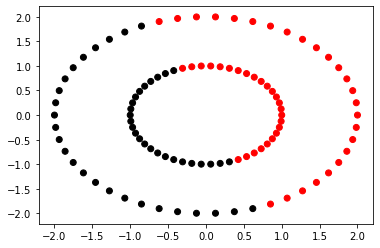

In [19]:
K = 2

X = circs()

X =  X.transpose()
sigma = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000] #Sigma Values
#Kmeans Clustering
kmeans = KMeans(n_clusters=K).fit(X)

clusters_kmeans = clusters_formation(kmeans.labels_, X, K)[0]

Loss_kmeans = loss(clusters_kmeans, kmeans.cluster_centers_)


LABEL_COLOR_MAP = {0 : 'r',
                   1 : 'k',
                   }
label_color = [LABEL_COLOR_MAP[l] for l in kmeans.labels_]

plt.scatter(X[:, 0], X[:, 1], c=label_color)
plt.show()

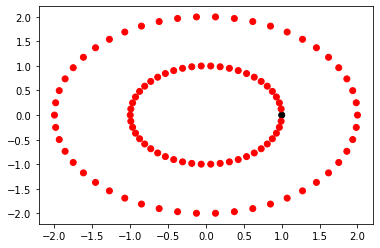

0.9898989898989908


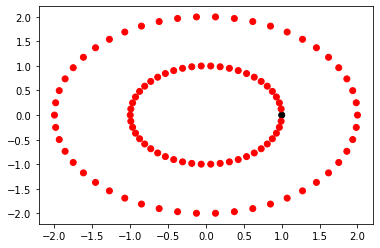

0.9898989898989908


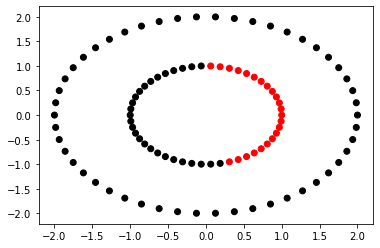

0.7872243665591289


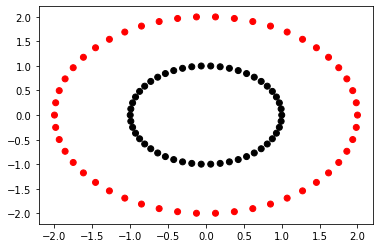

8.60193955361816e-26


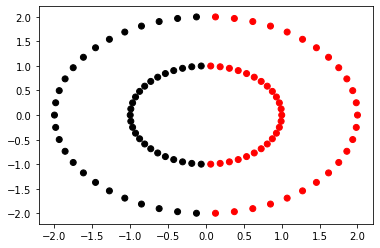

0.28941202982705105


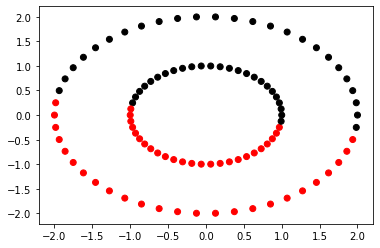

0.4271310403530406


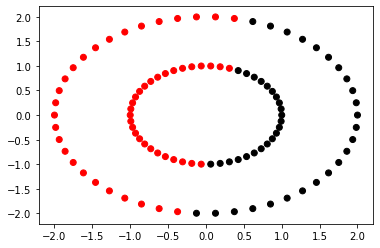

0.4311059076069457


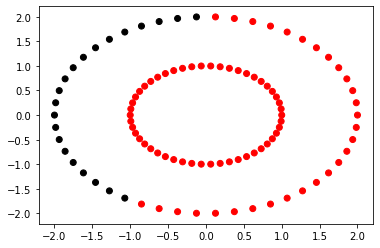

0.4510507783228558


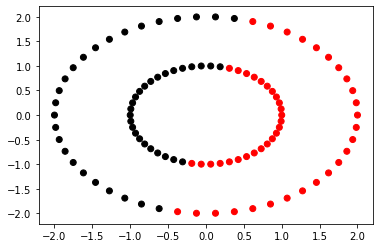

0.4294456442706711
Loss_kmeans 158.69083991428775
Loss_spectral 8.60193955361816e-26
The value of sigma for which Spectral Clustering Outperforms Kmeans is 0.1


In [18]:
#Spectral Clustering
best_sigma = 0
best_loss = 100
for i in sigma:
    clusters, cluster_centers, labels = spectralClustering(X, K, i)
    LABEL_COLOR_MAP = {0 : 'r',
                       1 : 'k',
                       }
    label_colors = [LABEL_COLOR_MAP[l] for l in labels]
    plt.scatter(X[:, 0], X[:, 1], c=label_colors)
    plt.show()
    Loss_spectral =  loss(clusters, cluster_centers)
    if(Loss_spectral < Loss_kmeans and Loss_spectral < best_loss):
        best_sigma = i
        best_loss = Loss_spectral
        

print('Loss_kmeans', Loss_kmeans)
    
    
print('Loss_spectral', best_loss)


print('The value of sigma for which Spectral Clustering Outperforms Kmeans is', best_sigma)

In [ ]:
X_train, y_train = read_in(r'C:\Users\miriy\Downloads\spam_train.data')
X_test, y_test = read_in(r'C:\Users\miriy\Downloads\spam_test.data')
X_valid, y_valid = read_in(r'C:\Users\miriy\Downloads\spam_validation.data')
W = normalize_data(X_train, X_train)
W_valid = normalize_data(X_valid, X_train)
cov_mat = np.cov(W.T)
eig_vals, eig_vecs = np.linalg.eigh(cov_mat)
idx = eig_vals.argsort()[::-1]
eig_vals = eig_vals[idx]
eig_vecs = eig_vecs[:,idx]
D = X_train.shape[1]
best_C =0
best_error=100
for k in range(1,11):
    for s in range(1,21):
        error = 0
        for c in [1,10,100,1000]:
            features = feature_select(D, k,s,eig_vals,eig_vecs)
            clf = LinearSVC(C=c, random_state=0)
            clf.fit(W[:,features], y_train)
            preds = clf.predict(W_valid[:,features])
            error += 1 - np.mean(preds==y_valid)
            if error<best_error:
                best_error = error
                best_C=c
            print('k = ' + str(k) + ', s = ' + str(s) + ', C = ' + str(c)+':  error is ' +
                 str(error))